In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
df = pd.read_csv("/home/mstr/Desktop/TAU/final_project/nilm_tau_eee/data/data.csv")
df = df.drop(columns="DoubleTime")
df = df.drop(index=0)
[datetime.strptime(time[:time.find(".")], '%m/%d/%y  %H:%M:%S') for time in df["StringTime"]]
df["StringTime"] = [datetime.strptime(time[:time.find(".")], '%m/%d/%y  %H:%M:%S') for time in df["StringTime"]]
df["StringTime"] = df.StringTime - df.StringTime.iloc[0]
time = list(df["StringTime"])

In [33]:
R = 1_000*np.divide(df["kW L3"],np.power(df["I3"],2))

In [18]:
df.columns

Index(['StringTime', 'V1', 'V2', 'V3', 'I1', 'I2', 'I3', 'I1:1', 'I1 Ang',
       'I2 Ang', 'I3 Ang', 'kW L1', 'kW L2', 'kW L3', 'kvar L1', 'kvar L2',
       'kvar L3', 'PF L1', 'PF L2', 'PF L3', 'I1 THD', 'I2 THD', 'I3 THD',
       'I1 KF', 'I2 KF', 'I3 KF', 'I1 %HD03', 'I1 %HD05', 'I1 %HD07',
       'I1 %HD09', 'I2 %HD03', 'I2 %HD05', 'I2 %HD07', 'I2 %HD09', 'I3 %HD03',
       'I3 %HD05', 'I3 %HD07', 'I3 %HD09', 'PF', 'kvar', 'In'],
      dtype='object')

In [5]:
df.values[:,1]

array([228.1, 228.1, 228.1, ..., 227.3, 227.3, 227.3], dtype=object)

In [43]:
Z_R = 20*np.log10(abs(np.fft.fft(R)))

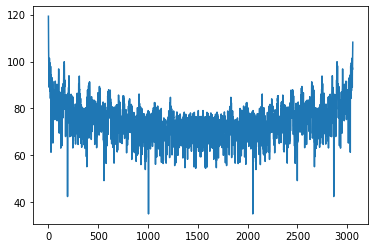

In [44]:
import matplotlib.pyplot as plt

plt.plot(Z_R)
plt.show()

In [39]:
max(R)

2006.172839506173

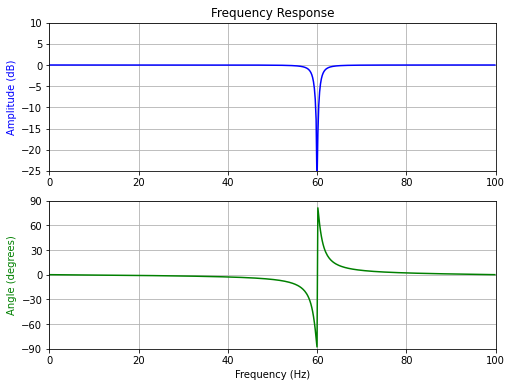

In [2]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
fs = 200.0  # Sample frequency (Hz)
f0 = 60.0  # Frequency to be removed from signal (Hz)
Q = 30.0  # Quality factor
# Design notch filter
b, a = signal.iirnotch(f0, Q, fs)

freq, h = signal.freqz(b, a, fs=fs)
# Plot
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(freq, 20*np.log10(abs(h)), color='blue')
ax[0].set_title("Frequency Response")
ax[0].set_ylabel("Amplitude (dB)", color='blue')
ax[0].set_xlim([0, 100])
ax[0].set_ylim([-25, 10])
ax[0].grid()
ax[1].plot(freq, np.unwrap(np.angle(h))*180/np.pi, color='green')
ax[1].set_ylabel("Angle (degrees)", color='green')
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_xlim([0, 100])
ax[1].set_yticks([-90, -60, -30, 0, 30, 60, 90])
ax[1].set_ylim([-90, 90])
ax[1].grid()
plt.show()